In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import seaborn as sn
import matplotlib.pyplot as plt
import qeds
%matplotlib inline
import os
import math
import qeds
qeds.themes.mpl_style();

from IPython.display import display
import statistics

In [2]:
spot = pd.read_csv('Spot_data.csv')
spot

,1,2,3,4,5
0,0.0113,0.0112,0.0146,0.0247,0.0172
1,0.0118,0.0112,0.0146,0.0246,0.0171
2,0.0116,0.0115,0.0148,0.0247,0.0173
3,0.0118,0.0117,0.0149,0.0247,0.0173
4,0.0120,0.0119,0.0153,0.0250,0.0176
5,0.0130,0.0129,0.0162,0.0180,0.0184
6,0.0136,0.0133,0.0167,0.0266,0.0190
7,0.0139,0.0134,0.0167,0.0267,0.0191
8,0.0135,0.0135,0.0168,0.0267,0.0191
9,0.0130,0.0132,0.0163,0.0263,0.0186


In [3]:
def lst(df, grp):
    y = df[grp].values.tolist()
    return y


sp1yr = lst(spot, "1")
sp2yr = lst(spot, "2")
sp3yr = lst(spot, "3")
sp4yr = lst(spot, "4")
sp5yr = lst(spot, "5")


dates = ["Jan 10","Jan 11","Jan 12","Jan 13","Jan 14","Jan 17","Jan 18","Jan 19","Jan 20","Jan 21"]
r = [sp1yr,sp2yr,sp3yr,sp4yr,sp5yr]

In [4]:
log_r = []
for r_yr in r:
    x_lst = []
    for i in range(9):
        x = math.log(r_yr[i+1]/r_yr[i])
        x_lst.append(x)
    xl = [round(elem, 5) for elem in x_lst]
    log_r.append(xl)

log_r

[[0.0433,
  -0.01709,
  0.01709,
  0.01681,
  0.08004,
  0.04512,
  0.02182,
  -0.0292,
  -0.03774],
 [0.0,
  0.02643,
  0.01724,
  0.01695,
  0.08069,
  0.03054,
  0.00749,
  0.00743,
  -0.02247],
 [0.0, 0.01361, 0.00673, 0.02649, 0.05716, 0.0304, 0.0, 0.00597, -0.03021],
 [-0.00406, 0.00406, 0.0, 0.01207, -0.3285, 0.39054, 0.00375, 0.0, -0.01509],
 [-0.00583, 0.01163, 0.0, 0.01719, 0.04445, 0.03209, 0.00525, 0.0, -0.02653]]

In [5]:
log_r_1yr = log_r[0]
log_r_2yr = log_r[1]
log_r_3yr = log_r[2]
log_r_4yr = log_r[3]
log_r_5yr = log_r[4]

In [10]:
data = np.array(log_r)
covMatrix = np.cov(data,bias=True)
covM = np.around(covMatrix, decimals=4)
covM

array([[ 0.0013,  0.0007,  0.0006, -0.001 ,  0.0005],
       [ 0.0007,  0.0007,  0.0006, -0.0017,  0.0005],
       [ 0.0006,  0.0006,  0.0005, -0.0008,  0.0004],
       [-0.001 , -0.0017, -0.0008,  0.0289, -0.0002],
       [ 0.0005,  0.0005,  0.0004, -0.0002,  0.0004]])

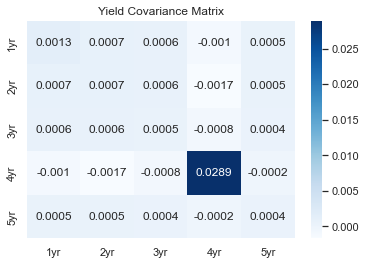

In [17]:
ax = plt.subplot()
sn.heatmap(covM, annot=True, cmap="Blues", fmt='g')
sn.set(font_scale=1)
ax.set_title('Yield Covariance Matrix');
ax.xaxis.set_ticklabels(["1yr", "2yr", "3yr", "4yr","5yr"]);
ax.yaxis.set_ticklabels(["1yr", "2yr", "3yr", "4yr","5yr"]);
plt.show()

In [20]:
solution = np.linalg.eig(covM)

In [33]:
eigenValues = solution[0]
eigenVectors = solution[1]
np. set_printoptions(suppress=True)

In [34]:
values = np.around(eigenValues, decimals=5)
values

array([ 0.02907,  0.00235,  0.00037,  0.00004, -0.00003])

In [35]:
vectors = np.around(eigenVectors, decimals=5)
vectors

array([[ 0.03826,  0.66998, -0.7409 , -0.02616, -0.00616],
       [ 0.06148,  0.47763,  0.43849,  0.08106, -0.75448],
       [ 0.03014,  0.42224,  0.35661,  0.63002,  0.5447 ],
       [-0.99688,  0.07135,  0.0127 ,  0.01599, -0.02696],
       [ 0.00911,  0.37365,  0.36257, -0.77173,  0.36509]])